# ___________Apple Stock Price Prediction_____

### importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### reading the data file

In [7]:
df=pd.read_csv("AAPL.csv")

In [10]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [11]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


### So the data shows, initial date as 2015-05-27 and last date as 2020-05-22

In [14]:
df1=df.reset_index()["close"]

In [15]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

### Plotting the "close" attribute pattern

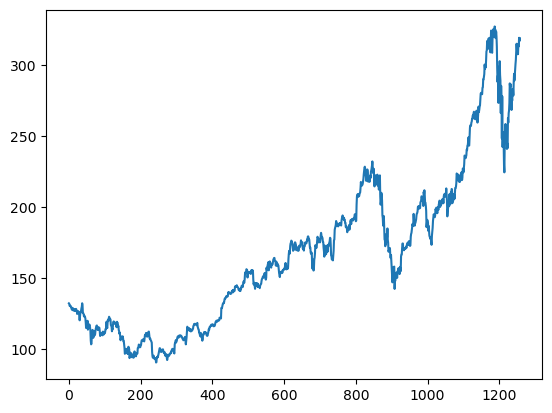

In [16]:
plt.plot(df1)

### scaling down all the values between 0 to 1

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
mmscaler=MinMaxScaler()

In [19]:
df1=mmscaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

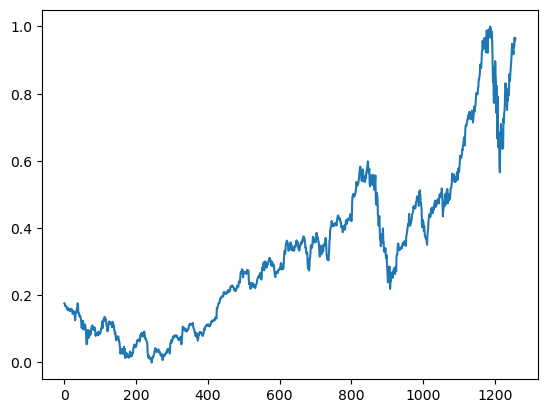

In [20]:
plt.plot(df1)

### dividing the data into two parts initially

In [24]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size

In [35]:
training_size,test_size

(817, 441)

In [33]:
training_dataset,testing_dataset=df1[:training_size],df1[training_size:len(df1)]

In [34]:
training_dataset.shape,testing_dataset.shape

((817, 1), (441, 1))

### defined a function which will give arrays according to the used given training days  

In [48]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

### using above function, splitted our *featured* data into train & test

In [50]:
time_step = 100
X_train, y_train = create_dataset(training_dataset, time_step)
X_test, ytest = create_dataset(testing_dataset, time_step)

In [53]:
X_train.shape,y_train.shape,X_test.shape,ytest.shape

((716, 100), (716,), (340, 100), (340,))

### preparing data for adding into Stacked LSTM model

In [56]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [57]:
X_train.shape,X_test.shape

((716, 100, 1), (340, 100, 1))

### imported necessary deep learning libraries 

In [59]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

### Stacked LSTM model preparation

In [60]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [61]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,ytest),verbose=1)

Epoch 1/100
23/23 [==============================] - 12s 227ms/step - loss: 0.0094 - val_loss: 0.0043
Epoch 2/100
23/23 [==============================] - 3s 152ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 3/100
23/23 [==============================] - 3s 153ms/step - loss: 7.9071e-04 - val_loss: 0.0052
Epoch 4/100
23/23 [==============================] - 4s 155ms/step - loss: 6.6859e-04 - val_loss: 0.0036
Epoch 5/100
23/23 [==============================] - 3s 153ms/step - loss: 6.2450e-04 - val_loss: 0.0036
Epoch 6/100
23/23 [==============================] - 4s 154ms/step - loss: 5.6268e-04 - val_loss: 0.0046
Epoch 7/100
23/23 [==============================] - 4s 156ms/step - loss: 5.8390e-04 - val_loss: 0.0031
Epoch 8/100
23/23 [==============================] - 3s 153ms/step - loss: 5.3337e-04 - val_loss: 0.0031
Epoch 9/100
23/23 [==============================] - 4s 154ms/step - loss: 5.6353e-04 - val_loss: 0.0026
Epoch 10/100
23/23 [==============================] - 4s 153ms

### Predicting the data and inversing it from 0 to 1 to actual value form

In [69]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 50ms/step


In [71]:
train_predict=mmscaler.inverse_transform(train_predict)
test_predict=mmscaler.inverse_transform(test_predict)

In [73]:
train_predict.shape

(716, 1)

### Testing Root Mean Squared Error

In [74]:
from sklearn.metrics import mean_squared_error
import math
rmse=math.sqrt(mean_squared_error(ytest,test_predict))
rmse

233.37424217437922

### Training RMSE value

In [82]:
from sklearn.metrics import mean_squared_error
import math
rmse2=math.sqrt(mean_squared_error(y_train,train_predict))
rmse2

140.88441834199475

In [96]:
a=numpy.empty_like(df1)

In [103]:
len(train_predict)

716

In [104]:
len(df1)

1258

### Plotting Actual, Training and Testing graph together

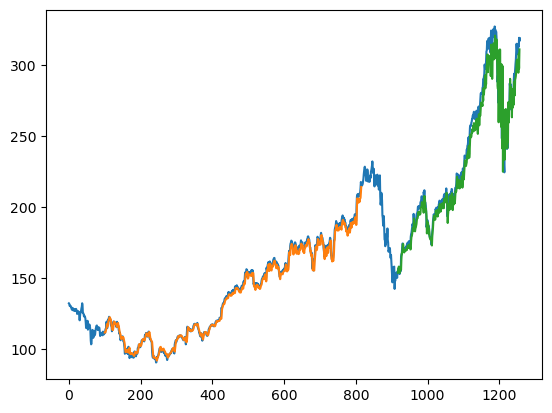

In [99]:
time_step=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(time_step*2)+1:len(df1)-1, :] = test_predict

plt.plot(mmscaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### In the above graph
### 1). Blue line --> acutal data
### 2).Orange --> training predicted data
### 3). Green -->testing predicted data